S&P 500 Visualization

This notebook was created to analyze and visualize the S&P 500.

The data set for this notebook was found on kaggle: https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks,


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
sp_500 = pd.read_csv('/content/drive/My Drive/sp500_companies.csv')
sp_500.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,224.31,3439591948288,1.296290e+11,-0.043,Cupertino,CA,United States,150000.0,"Apple Inc. designs, manufactures, and markets ...",0.066870
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,437.11,3248736698368,1.259820e+11,0.170,Redmond,WA,United States,221000.0,Microsoft Corporation develops and supports so...,0.063159
2,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,117.93,2900877639680,4.927500e+10,2.621,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.056396
3,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,179.39,2205241311232,1.097230e+11,0.154,Mountain View,CA,United States,180895.0,Alphabet Inc. offers various products and plat...,0.042872
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,177.66,2205240262656,1.097230e+11,0.154,Mountain View,CA,United States,180895.0,Alphabet Inc. offers various products and plat...,0.042872


**Description of Columns in Dataset**

    Column              Description
    Exchange            A marketplace where securities, commodities, derivatives, and other financial instruments are traded
    Symbol              Unique code given to a company list on the exchange (Ticker)
    Shortname           Company's Short Name
    Longname            Company's Long Name
    Sector              The stock market is divided into 11 market sectors based on the Global Industry Classification Standard, or GICS.
    Industry            Industry is a more specific classification than sector.  It categorizes businesses in each sector by their shared business practices & areas of focus (24 industry groups)
    CurrentPrice        The most recent selling price of a stock, currency, commodity, or precious metal that is traded on an exchange
    Marketcap           Short for Market Capitalization, represents the total value of a company's outstanding shares of stock
    Ebitda              (Earnings before interest, taxes, depreciation, and amortization) Measure of core corporate profitability that adds back interest, taxes, depreciation, & amortization to net income
    Revenuegrowth       A simple calculation that allows an investor to measure a company's increase in revenue compared to previous quarters or years; Revenuegrowth = (current period revenue - prior period revenue / prior period revenue
    City                Company's HQ city
    State               Company's HQ state
    Country             Company's HQ country
    Fulltimeemployees   Number of full-time employees working for company
    Longbusinesssummary Summary of the company's services
    Weight              The S&P 500 uses a market-cap-weighting method that gives a higer percentage allocation to companies with the largest market capitalizations; formula: company weighting in s&p = company market cap / total of all market caps


   

In [20]:
sp_500.isna().sum()

,0
Exchange,0
Symbol,0
Shortname,0
Longname,0
Sector,0
Industry,0
Currentprice,0
Marketcap,0
Ebitda,29
Revenuegrowth,2


In [21]:
sp_500=sp_500.dropna()

In [22]:
sp_500.isna().sum()

,0
Exchange,0
Symbol,0
Shortname,0
Longname,0
Sector,0
Industry,0
Currentprice,0
Marketcap,0
Ebitda,0
Revenuegrowth,0


In [23]:
# Group the data by industry and sector
groups = sp_500.groupby(['Industry', 'Sector'])

In [24]:
# Calculating statistics for each group
# Marketcap = Mean Market Capitalization; Ebitda = Median EBITDA; Revenuegrowth = Mean Revenue Growth
stats = groups.agg({'Marketcap': 'mean', 'Ebitda': 'median', 'Revenuegrowth': 'mean' })

In [25]:
# Creating Columns of the Groups
stats.reset_index(inplace=True)

In [26]:
# Using Mean Market Capitalization to find the top Industries
top_ind = stats.nlargest(10, 'Marketcap')['Industry']

In [27]:
# Showing only the top industries
top_ind_df = sp_500[sp_500['Industry'].isin(top_ind)]

Visualization

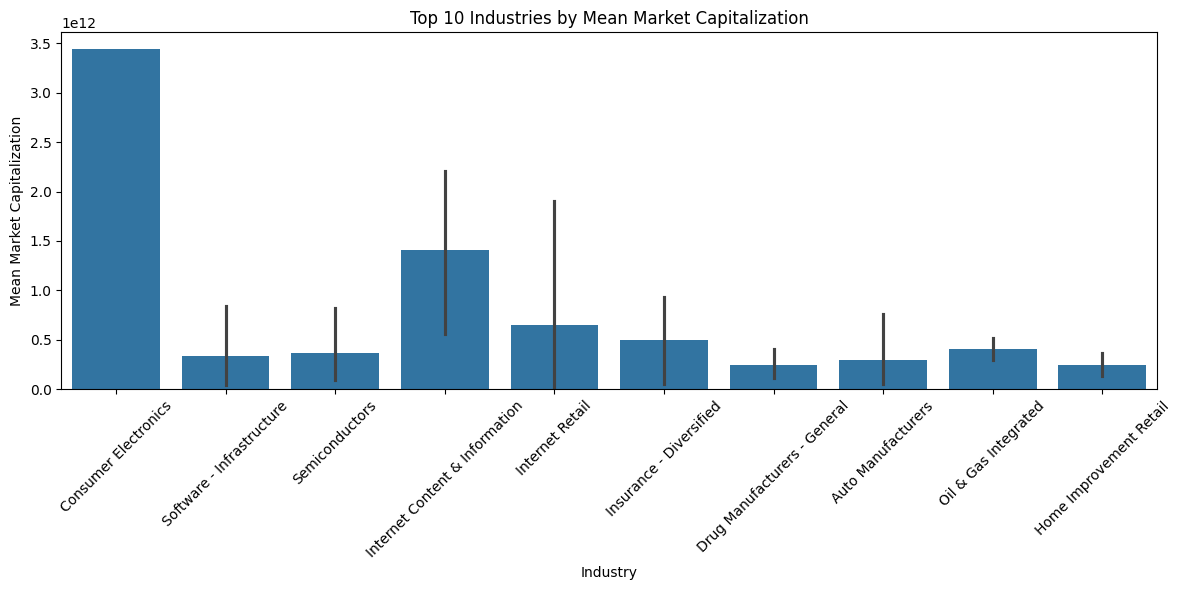

In [28]:
# Mean Market Capitalization by Industry for Top 10 Industries - Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(data=top_ind_df, x='Industry', y='Marketcap')
plt.xticks(rotation=45)
plt.title('Top 10 Industries by Mean Market Capitalization')
plt.xlabel('Industry')
plt.ylabel('Mean Market Capitalization')
plt.tight_layout()
plt.show()

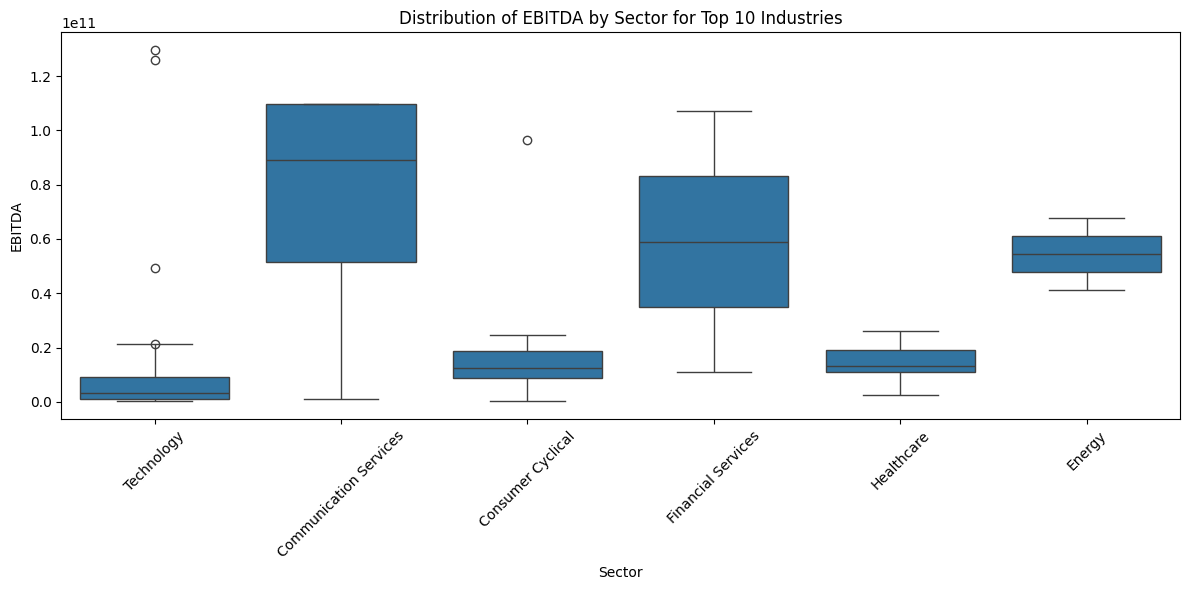

In [29]:
# Distribution of EBITDA by for Top 10 Industries by Sector - Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=top_ind_df, x='Sector', y='Ebitda')
plt.xticks(rotation=45)
plt.title('Distribution of EBITDA by Sector for Top 10 Industries')
plt.xlabel('Sector')
plt.ylabel('EBITDA')
plt.tight_layout()
plt.show()

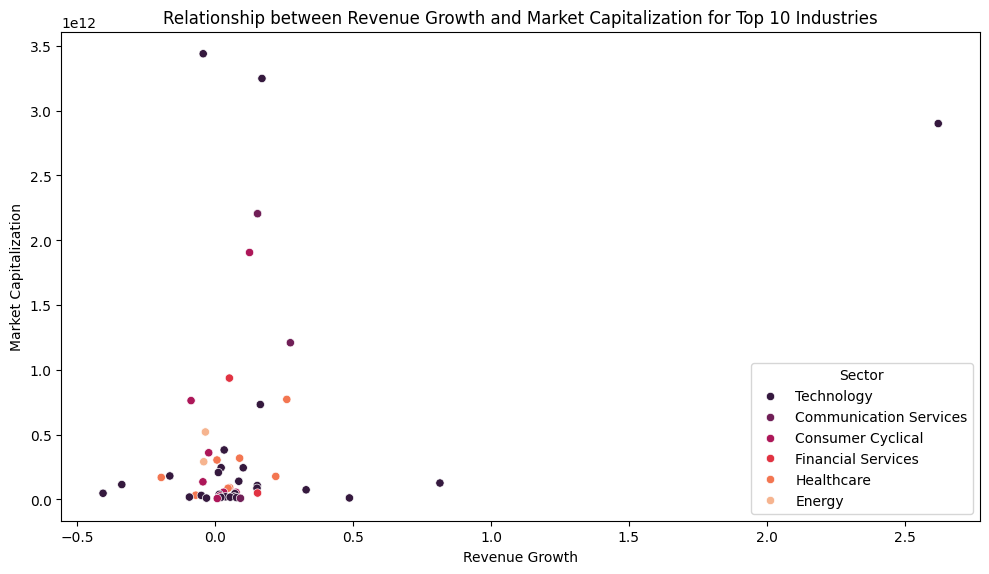

In [39]:
# Relationship between Revenue Growth and Market Capitalization for Top 10 Industries - Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_ind_df, x='Revenuegrowth', y='Marketcap', hue='Sector', palette='rocket')
plt.title('Relationship between Revenue Growth and Market Capitalization for Top 10 Industries')
plt.xlabel('Revenue Growth')
plt.ylabel('Market Capitalization')
plt.tight_layout()
plt.show()

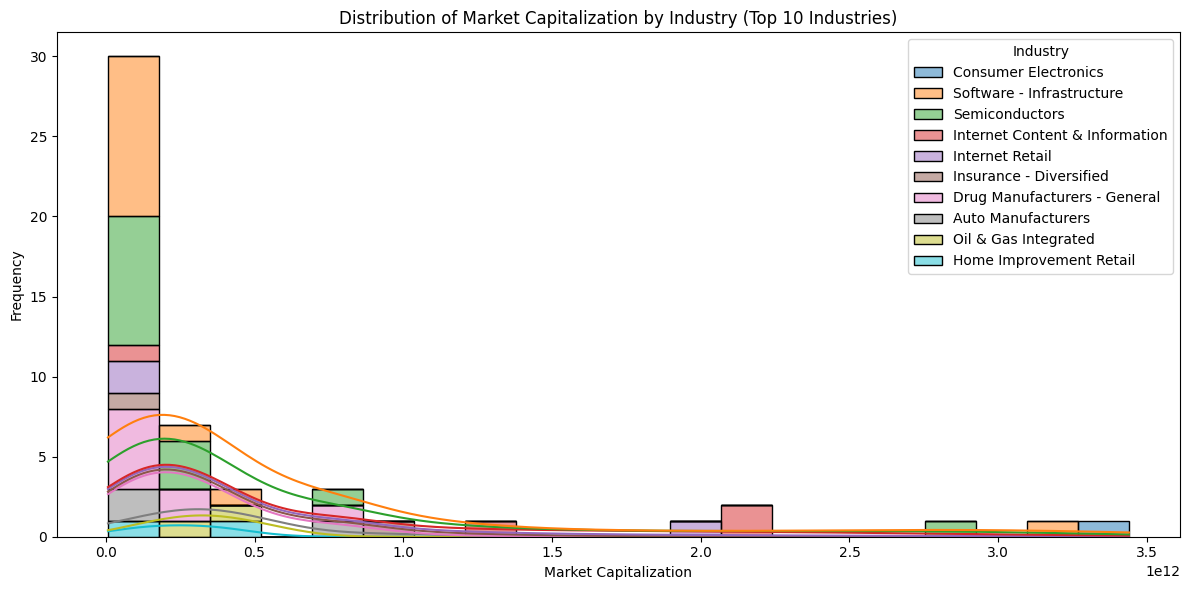

In [42]:
# Market Capitalization by Industries for Top 10 Industries - Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=top_ind_df, x='Marketcap', hue='Industry', kde=True, multiple='stack', bins=20)
plt.title('Distribution of Market Capitalization by Industry (Top 10 Industries)')
plt.xlabel('Market Capitalization')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<ipython-input-64-2585db973827>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_ind_df, x='Industry', y='Revenuegrowth', palette='rocket')


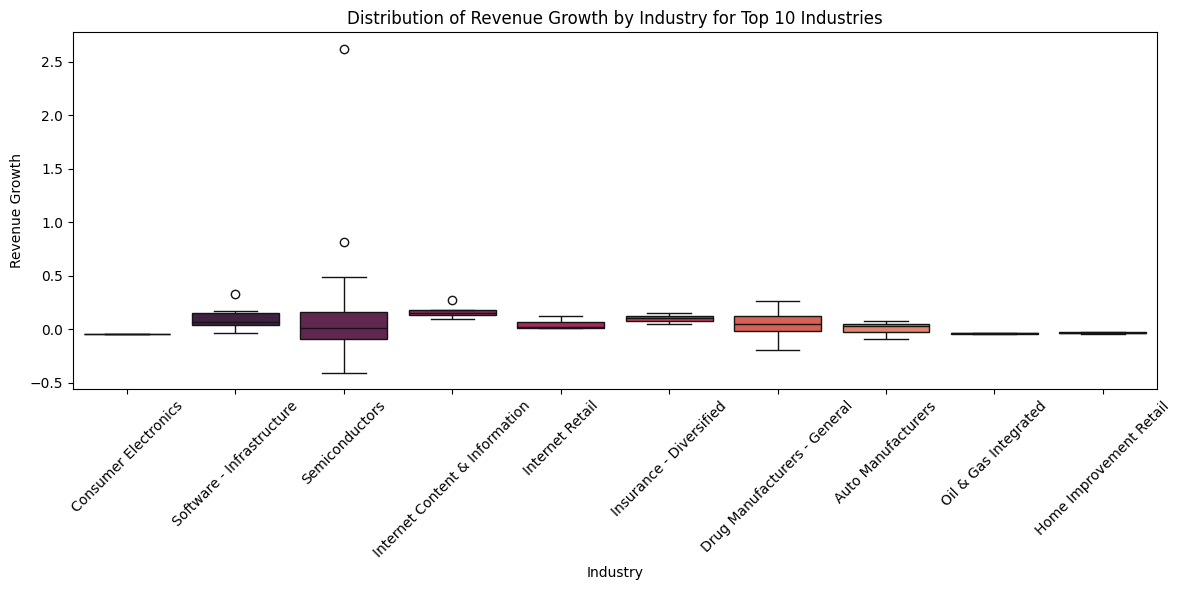

In [64]:
# Visualization 5: Box plot of Revenue Growth by Industry for the top 10 industries - Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=top_ind_df, x='Industry', y='Revenuegrowth', palette='rocket')
plt.title('Distribution of Revenue Growth by Industry for Top 10 Industries')
plt.xlabel('Industry')
plt.ylabel('Revenue Growth')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


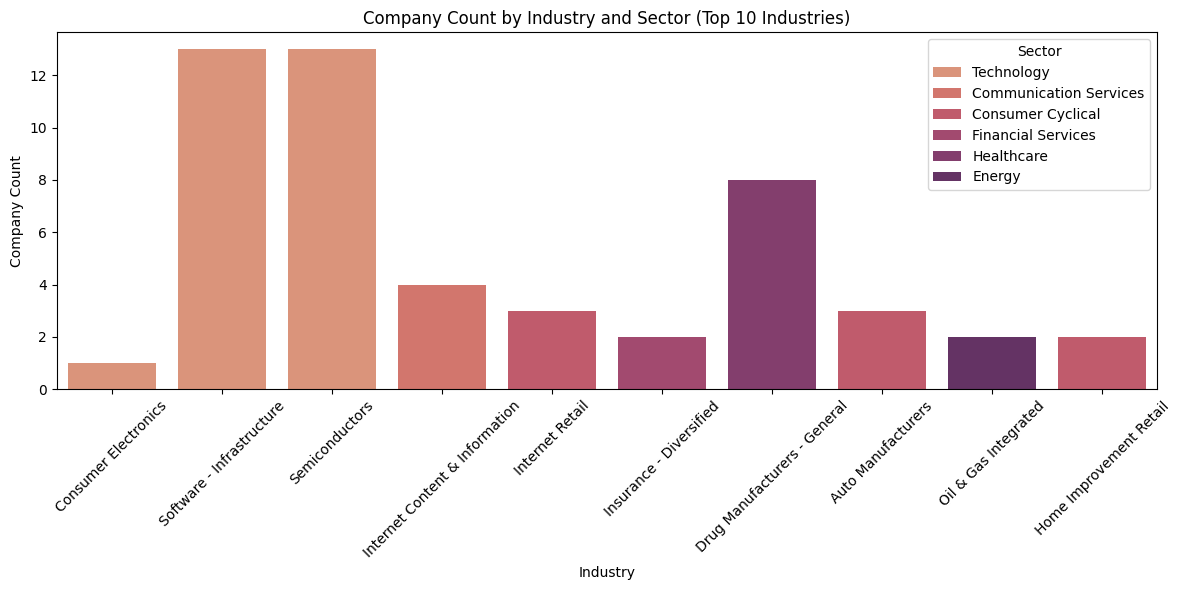

In [57]:
# Company Count by Industry and Sector for Top 10 Industries - Count Plot
plt.figure(figsize=(12, 6))
sns.countplot(data=top_ind_df, x='Industry', hue='Sector', palette='flare')
plt.title('Company Count by Industry and Sector (Top 10 Industries)')
plt.xlabel('Industry')
plt.ylabel('Company Count')
plt.xticks(rotation=45)
plt.legend(title='Sector', loc='upper right')
plt.tight_layout()
plt.show()

<ipython-input-75-5ef203886614>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=longname_counts.index[:10], y=longname_counts.values[:10], palette='nipy_spectral')


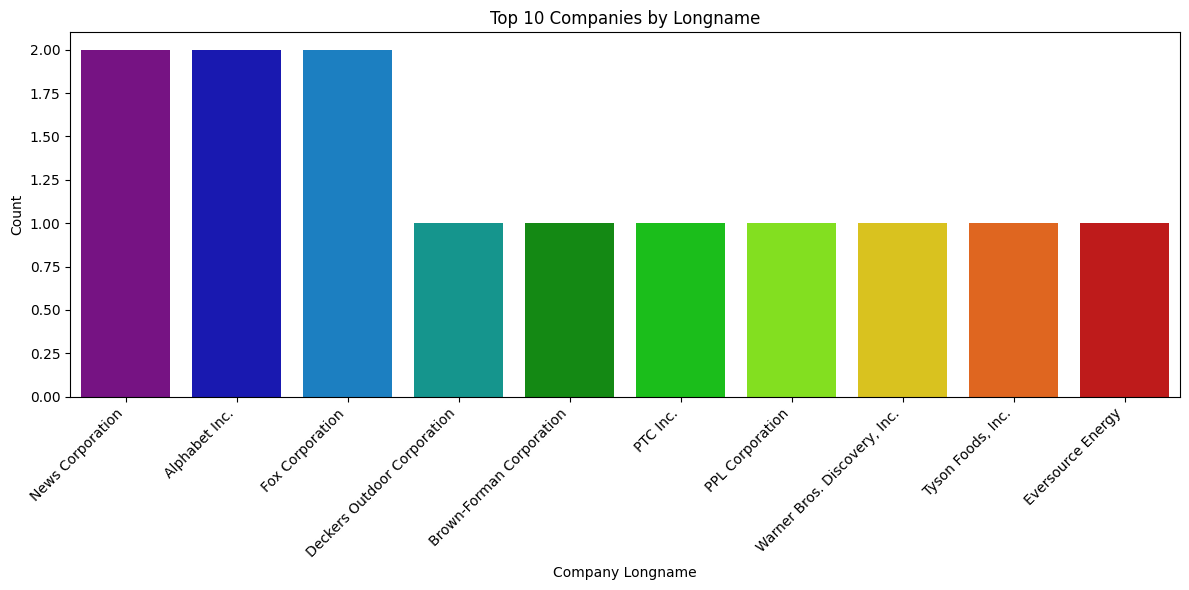

In [75]:
# Plotting the distribution of long names and Counting the Occurences of Each Unique Name - Bar Plot

longname_counts = sp_500['Longname'].value_counts()


plt.figure(figsize=(12, 6))
sns.barplot(x=longname_counts.index[:10], y=longname_counts.values[:10], palette='nipy_spectral')
plt.title('Top 10 Companies by Longname')
plt.xlabel('Company Longname')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

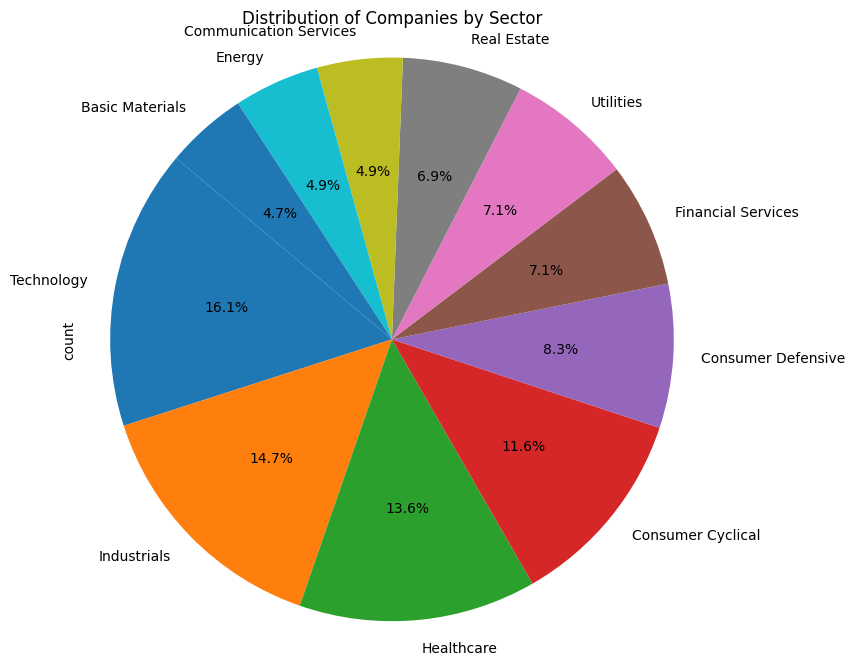

In [63]:
# Sectors - Pie Chart
plt.figure(figsize=(8, 8))
sp_500['Sector'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Companies by Sector')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

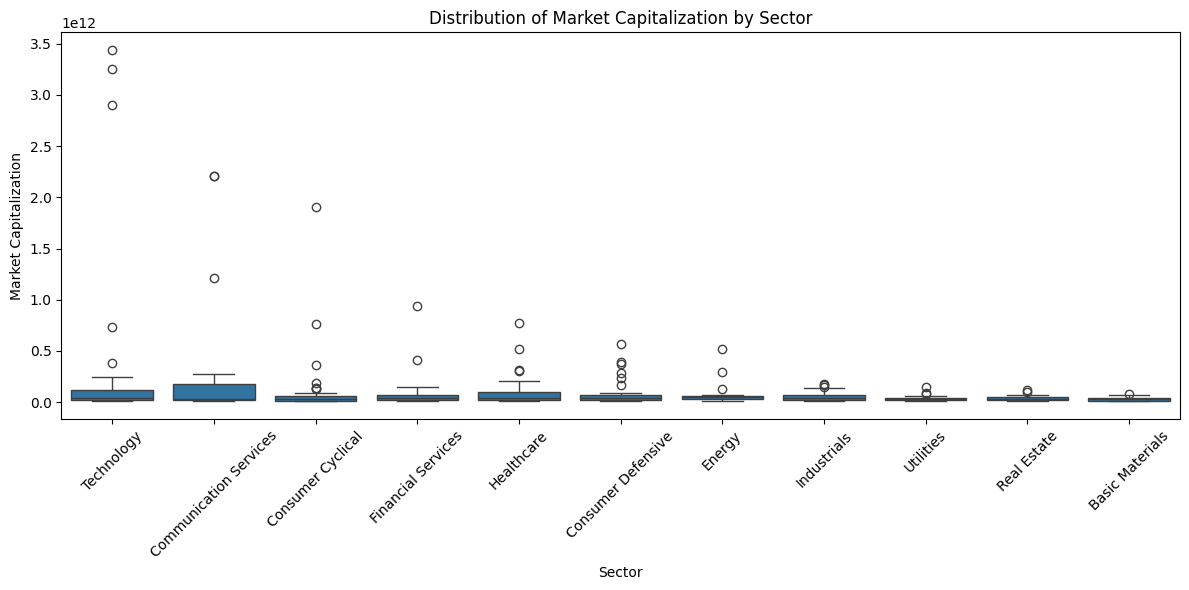

In [74]:
# Market Capitalization by Sector - Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=sp_500, x='Sector', y='Marketcap')
plt.title('Distribution of Market Capitalization by Sector')
plt.xlabel('Sector')
plt.ylabel('Market Capitalization')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

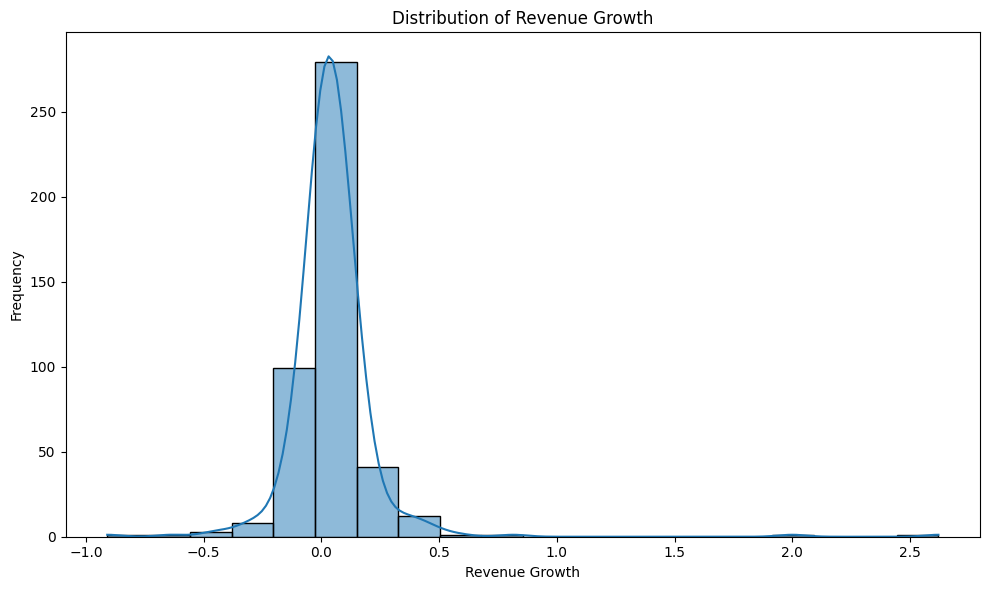

In [73]:
# Revenue Growth - Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=sp_500, x ='Revenuegrowth', kde=True, bins=20)
plt.title('Distribution of Revenue Growth')
plt.xlabel('Revenue Growth')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()